# BTS Songs - Spotify Audio Features Analysis  

In order to access certain features of the Web API, we need to tell spotify that we're a legitimate app. To do this, go to https://developer.spotify.com/my-applications and create a new Application.

For the Redirect URI, add http://localhost/ 

From that page, copy your ClientId and your ClientSecret.

You need to set your Spotify API credentials. You can do this by
setting environment variables like so

```python
os.environ['SPOTIPY_CLIENT_ID'] = 'your-spotify-client-id'
os.environ['SPOTIPY_CLIENT_SECRET'] = 'your-spotify-client-secret'
os.environ['SPOTIPY_REDIRECT_URI' ] = 'http://localhost/'
```

In [2]:
# -*- coding: utf-8 -*-
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import minmax_scale
import spotipy
import spotipy.util as util
from requests.auth import HTTPBasicAuth
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from math import pi


In [3]:
SPOTIPY_CLIENT_ID = os.environ.get('SPOTIPY_CLIENT_ID')
SPOTIPY_CLIENT_SECRET = os.environ.get('SPOTIPY_CLIENT_SECRET')
SPOTIPY_REDIRECT_URI = os.environ.get('SPOTIPY_REDIRECT_URI')

## Get the access token for the app given the code

In [4]:
# Get token 
token = util.oauth2.SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
cache_token = token.get_access_token()
# Create a Spotify API object
spotify = spotipy.Spotify(cache_token)

## Get Spotify catalog information about an artist’s albums



In [5]:
ARTIST_ID = '3Nrfpe0tUJi4K4DXYWgMUX'
bts_albums = spotify.artist_albums(ARTIST_ID)['items']
bts_albums_df = pd.DataFrame(bts_albums)
bts_albums_df['index'] = bts_albums_df.index
bts_albums_df

,album_group,album_type,artists,available_markets,external_urls,href,id,images,name,release_date,release_date_precision,total_tracks,type,uri,index
0,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/1A...,https://api.spotify.com/v1/albums/1AvXa8xFEXtR...,1AvXa8xFEXtR3hb4bgihIK,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",MAP OF THE SOUL : PERSONA,2019-04-12,day,7,album,spotify:album:1AvXa8xFEXtR3hb4bgihIK,0
1,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/2l...,https://api.spotify.com/v1/albums/2lATw9ZAVp7I...,2lATw9ZAVp7ILQcOKPCPqp,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Love Yourself 結 'Answer',2018-08-24,day,26,album,spotify:album:2lATw9ZAVp7ILQcOKPCPqp,1
2,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/2j...,https://api.spotify.com/v1/albums/2jJfnAZE6IG3...,2jJfnAZE6IG3oYnUv2eCj4,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Love Yourself 轉 'Tear',2018-05-18,day,11,album,spotify:album:2jJfnAZE6IG3oYnUv2eCj4,2
3,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/66...,https://api.spotify.com/v1/albums/66J1OXSaS3hB...,66J1OXSaS3hBZASOV3el8t,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",FACE YOURSELF,2018-04-03,day,12,album,spotify:album:66J1OXSaS3hBZASOV3el8t,3
4,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/44...,https://api.spotify.com/v1/albums/442zUwKHCTO4...,442zUwKHCTO47XPF7cUSqY,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Youth,2017-11-01,day,13,album,spotify:album:442zUwKHCTO47XPF7cUSqY,4
5,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/2F...,https://api.spotify.com/v1/albums/2FTS6a6DLXMN...,2FTS6a6DLXMNp8flyA0HGO,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Love Yourself 承 'Her',2017-09-18,day,9,album,spotify:album:2FTS6a6DLXMNp8flyA0HGO,5
6,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/7L...,https://api.spotify.com/v1/albums/7LF4N7lvyDhr...,7LF4N7lvyDhrPBuCJ1rplJ,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",You Never Walk Alone,2017-02-13,day,18,album,spotify:album:7LF4N7lvyDhrPBuCJ1rplJ,6
7,album,album,[{'external_urls': {'spotify': 'https://open.s...,[JP],{'spotify': 'https://open.spotify.com/album/6X...,https://api.spotify.com/v1/albums/6XR3l5Do1Vwp...,6XR3l5Do1VwpmnOVsAoFHO,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",YOU NEVER WALK ALONE,2017-02-13,day,18,album,spotify:album:6XR3l5Do1VwpmnOVsAoFHO,7
8,album,album,[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",{'spotify': 'https://open.spotify.com/album/17...,https://api.spotify.com/v1/albums/17FnTn4P3Bky...,17FnTn4P3Bkyf6mbNQDhhy,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Wings,2016-10-10,day,15,album,spotify:album:17FnTn4P3Bkyf6mbNQDhhy,8
9,album,album,[{'external_urls': {'spotify': 'https://open.s...,[JP],{'spotify': 'https://open.spotify.com/album/4H...,https://api.spotify.com/v1/albums/4HmVBjp09qwq...,4HmVBjp09qwqEFSg20EEla,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",WINGS,2016-10-10,day,15,album,spotify:album:4HmVBjp09qwqEFSg20EEla,9


## Get song list in the lastest album 

In [6]:
recent_album = bts_albums_df.loc[0,:]
recent_album_id = recent_album['id']
recent_album_name = recent_album['name']
recent_album_id, recent_album_name

('1AvXa8xFEXtR3hb4bgihIK', 'MAP OF THE SOUL : PERSONA')

In [7]:
# BTS Album
bts_album = spotify.album_tracks(recent_album_id)['items']
tracks_df = pd.DataFrame(bts_album)
columns = list(tracks_df)
filtered = ['id', 'name']
tracks_df = tracks_df.drop(columns=[x for x in columns if x not in filtered])
tracks_df

,id,name
0,2isSdmQfVv32j2haL6hk9x,Intro : Persona
1,5KawlOMHjWeUjQtnuRs22c,Boy With Luv (feat. Halsey)
2,5hnbE5BF2e8BCk9OMR1UVC,Mikrokosmos
3,6KUE0HSSudAp9AOycaF6SH,Make It Right
4,7lthOBXNue2IvedLRfkod8,HOME
5,0eeeyCAGnGZInPtpkdYiPa,Jamais Vu
6,6JdS5rJvJaRA7B1tcm7kxZ,Dionysus


## Get audio features for all tracks

In [8]:
all_audio_features = []
for song_id in tracks_df['id']:
    result = spotify.audio_features([song_id])[0]
    all_audio_features.append(result)

In [9]:
pd.DataFrame(all_audio_features)

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.0278,https://api.spotify.com/v1/audio-analysis/2isS...,0.469,171023,0.870,2isSdmQfVv32j2haL6hk9x,0,9,0.3130,-4.475,0,0.3420,86.622,4,https://api.spotify.com/v1/tracks/2isSdmQfVv32...,audio_features,spotify:track:2isSdmQfVv32j2haL6hk9x,0.652
1,0.0923,https://api.spotify.com/v1/audio-analysis/5Kaw...,0.645,229773,0.862,5KawlOMHjWeUjQtnuRs22c,0,11,0.1920,-4.757,0,0.0965,119.991,4,https://api.spotify.com/v1/tracks/5KawlOMHjWeU...,audio_features,spotify:track:5KawlOMHjWeUjQtnuRs22c,0.798
2,0.1250,https://api.spotify.com/v1/audio-analysis/5hnb...,0.580,224225,0.858,5hnbE5BF2e8BCk9OMR1UVC,0,8,0.0502,-5.212,1,0.1140,174.039,3,https://api.spotify.com/v1/tracks/5hnbE5BF2e8B...,audio_features,spotify:track:5hnbE5BF2e8BCk9OMR1UVC,0.475
3,0.0104,https://api.spotify.com/v1/audio-analysis/6KUE...,0.638,226321,0.703,6KUE0HSSudAp9AOycaF6SH,0,7,0.1320,-7.874,1,0.4440,105.766,4,https://api.spotify.com/v1/tracks/6KUE0HSSudAp...,audio_features,spotify:track:6KUE0HSSudAp9AOycaF6SH,0.261
4,0.0142,https://api.spotify.com/v1/audio-analysis/7lth...,0.633,234178,0.799,7lthOBXNue2IvedLRfkod8,0,7,0.1940,-4.625,0,0.0429,142.991,4,https://api.spotify.com/v1/tracks/7lthOBXNue2I...,audio_features,spotify:track:7lthOBXNue2IvedLRfkod8,0.535
5,0.2260,https://api.spotify.com/v1/audio-analysis/0eee...,0.608,227275,0.470,0eeeyCAGnGZInPtpkdYiPa,0,8,0.0963,-6.730,1,0.0428,81.000,4,https://api.spotify.com/v1/tracks/0eeeyCAGnGZI...,audio_features,spotify:track:0eeeyCAGnGZInPtpkdYiPa,0.241
6,0.0400,https://api.spotify.com/v1/audio-analysis/6JdS...,0.502,249215,0.910,6JdS5rJvJaRA7B1tcm7kxZ,0,7,0.3190,-2.769,1,0.1070,176.084,4,https://api.spotify.com/v1/tracks/6JdS5rJvJaRA...,audio_features,spotify:track:6JdS5rJvJaRA7B1tcm7kxZ,0.588


## Extract features and normalization

[Audio Features Object - Spoity API](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)

* Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic.
* Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
* Instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
* Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
* Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
* Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
* Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


In [10]:
keys = ['loudness', 'acousticness', 'duration_ms', 'energy', 'speechiness', 'acousticness', 'liveness', 'danceability', 'valence', 'key', 'tempo']

# Get list of features and normalize values from 0 to 1
# In order to plot, normalize the key, loudness, tempo, and duration_ms values to be from 0 to 1. 
def normalized(key, lst):
    feature = [x[key] for x in lst]
    if key in ['key', 'loudness', 'tempo', 'duration_ms']:
        return list(minmax_scale(feature))
    else:
        return feature
    
audio_features_res = {}
for key in keys:
    audio_features_res[key] = normalized(key, all_audio_features)
    

audio_features_df = pd.DataFrame(audio_features_res)
audio_features_df.rename(columns={'duration_ms':'duration'}, inplace=True)
audio_features_df


,loudness,acousticness,duration,energy,speechiness,liveness,danceability,valence,key,tempo
0,0.665818,0.0278,0.000000,0.870,0.3420,0.3130,0.469,0.652,0.50,0.059127
1,0.610578,0.0923,0.751356,0.862,0.0965,0.1920,0.645,0.798,1.00,0.410069
2,0.521450,0.1250,0.680402,0.858,0.1140,0.0502,0.580,0.475,0.25,0.978493
3,0.000000,0.0104,0.707208,0.703,0.4440,0.1320,0.638,0.261,0.00,0.260464
4,0.636435,0.0142,0.807691,0.799,0.0429,0.1940,0.633,0.535,0.00,0.651960
5,0.224094,0.2260,0.719409,0.470,0.0428,0.0963,0.608,0.241,0.25,0.000000
6,1.000000,0.0400,1.000000,0.910,0.1070,0.3190,0.502,0.588,0.00,1.000000


## Get list of popularity

In [11]:
all_track_popularity = []
for song_id in tracks_df['id']:
    result = spotify.track(song_id)
    all_track_popularity.append(result['popularity'])

popularity_df = pd.DataFrame({'popularity': list(all_track_popularity)})
popularity_df.columns = ['popularity']
pd.concat([tracks_df, popularity_df], axis=1, sort=False)

,id,name,popularity
0,2isSdmQfVv32j2haL6hk9x,Intro : Persona,77
1,5KawlOMHjWeUjQtnuRs22c,Boy With Luv (feat. Halsey),92
2,5hnbE5BF2e8BCk9OMR1UVC,Mikrokosmos,81
3,6KUE0HSSudAp9AOycaF6SH,Make It Right,81
4,7lthOBXNue2IvedLRfkod8,HOME,80
5,0eeeyCAGnGZInPtpkdYiPa,Jamais Vu,78
6,6JdS5rJvJaRA7B1tcm7kxZ,Dionysus,80


## Merge Audio Features DataFrames

In [12]:
# merge all DataFrame objects
concat_df = pd.concat([tracks_df, audio_features_df], axis=1, sort=False)
concat_df

,id,name,loudness,acousticness,duration,energy,speechiness,liveness,danceability,valence,key,tempo
0,2isSdmQfVv32j2haL6hk9x,Intro : Persona,0.665818,0.0278,0.000000,0.870,0.3420,0.3130,0.469,0.652,0.50,0.059127
1,5KawlOMHjWeUjQtnuRs22c,Boy With Luv (feat. Halsey),0.610578,0.0923,0.751356,0.862,0.0965,0.1920,0.645,0.798,1.00,0.410069
2,5hnbE5BF2e8BCk9OMR1UVC,Mikrokosmos,0.521450,0.1250,0.680402,0.858,0.1140,0.0502,0.580,0.475,0.25,0.978493
3,6KUE0HSSudAp9AOycaF6SH,Make It Right,0.000000,0.0104,0.707208,0.703,0.4440,0.1320,0.638,0.261,0.00,0.260464
4,7lthOBXNue2IvedLRfkod8,HOME,0.636435,0.0142,0.807691,0.799,0.0429,0.1940,0.633,0.535,0.00,0.651960
5,0eeeyCAGnGZInPtpkdYiPa,Jamais Vu,0.224094,0.2260,0.719409,0.470,0.0428,0.0963,0.608,0.241,0.25,0.000000
6,6JdS5rJvJaRA7B1tcm7kxZ,Dionysus,1.000000,0.0400,1.000000,0.910,0.1070,0.3190,0.502,0.588,0.00,1.000000


## Make audio features visualization - Radar Chart 

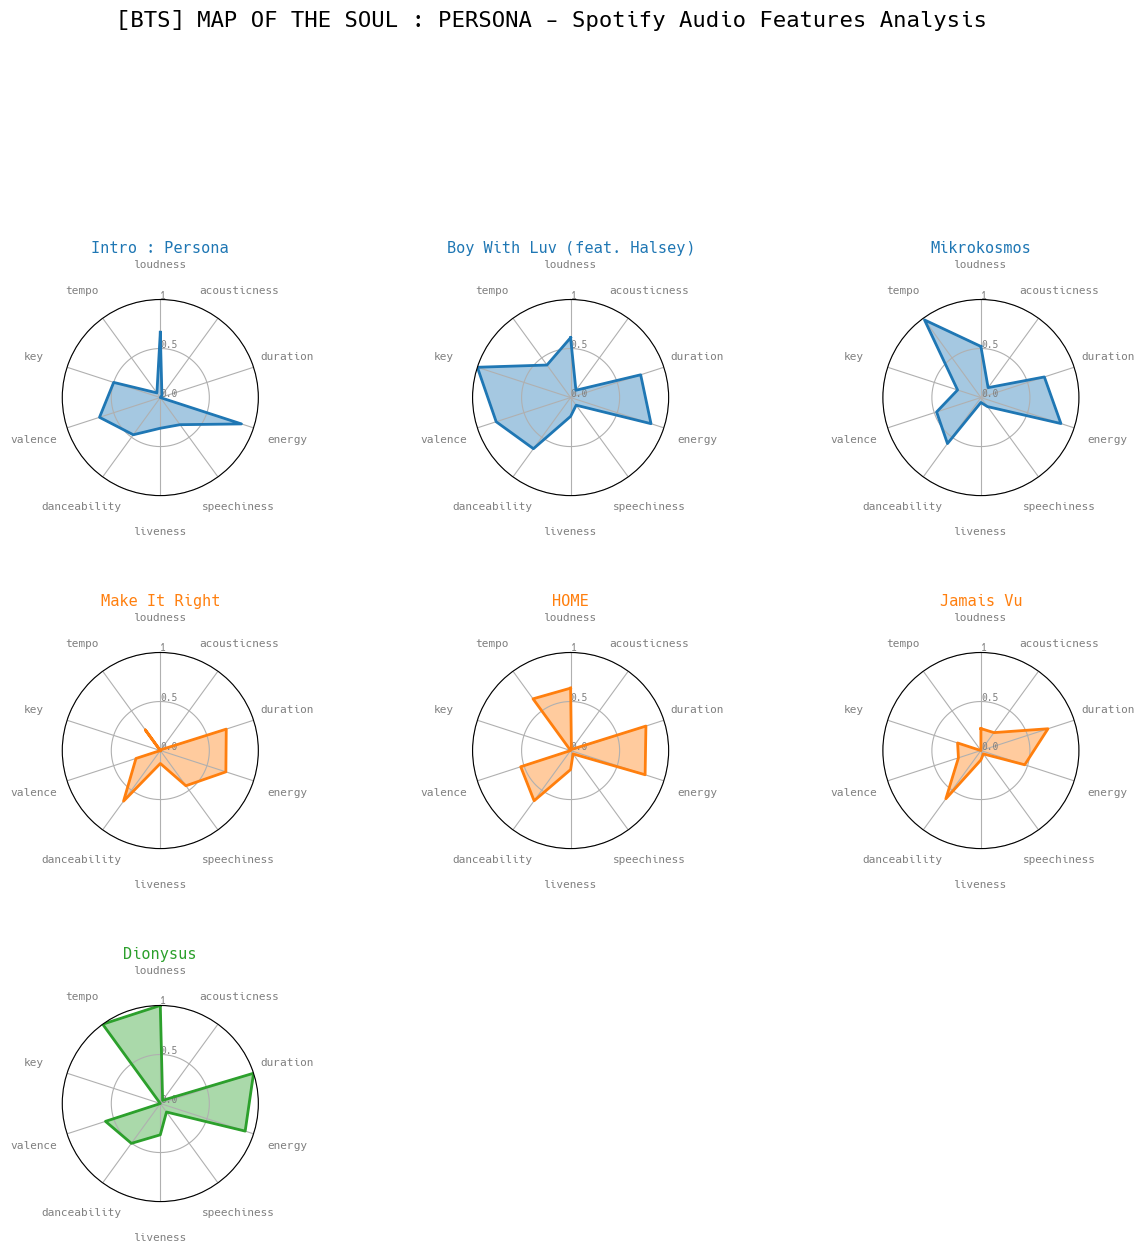

In [14]:
# Set font
FONT_NAME = "Hack Nerd Font"
plt.rcParams['font.family'] = FONT_NAME
plt.rcParams['axes.unicode_minus'] = False
df = concat_df

SONG_TITLES = tracks_df['name']
# List all fonts available in matplotlib plus samples
# http://jonathansoma.com/lede/foundations-2018/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/
  
def make_spider(row, title, color):
     
# number of variable
    categories=list(df)[2:]
    N = len(categories)
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(9,3,row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.tick_params(axis='both', which='major', pad=15)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.0, 0.5, 1], ["0.0","0.5", "1"], color="grey", size=7)
    plt.ylim(0,1)
    
    
    # Set starting index
    values=df.iloc[row].tolist()[2:]
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.2)

# initialize the figure
my_dpi=100
plt.figure(figsize=(1500/my_dpi, 4000/my_dpi), dpi=my_dpi)
plt.subplots_adjust(hspace = .8)
plt.suptitle(f'[BTS] {recent_album_name} - Spotify Audio Features Analysis', y=.95, fontsize=16, va='center')

# Create a color palette
my_palette = plt.cm.get_cmap("tab10") 

# Loop to plot
for row in range(0, len(df.index)):
    make_spider(row=row, title=f'{SONG_TITLES[row]}', color=my_palette(int(row/3)))

if not os.path.exists('image'):
    os.makedirs('image')

plt.savefig(f'image/{recent_album_name}.png', dpi=300)
plt.show()
plt.close()